<a href="https://colab.research.google.com/github/GoriyashKashyap/LaunchED_Projects/blob/main/EDA_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
os.chdir('/content/drive/MyDrive/Machine Learning')

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
df=pd.read_csv('dirty_cafe_sales.csv')

In [6]:
df.head()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4,1.0,ERROR,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    10000 non-null  object
 1   Item              9667 non-null   object
 2   Quantity          9862 non-null   object
 3   Price Per Unit    9821 non-null   object
 4   Total Spent       9827 non-null   object
 5   Payment Method    7421 non-null   object
 6   Location          6735 non-null   object
 7   Transaction Date  9841 non-null   object
dtypes: object(8)
memory usage: 625.1+ KB


In [8]:
df.describe()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
count,10000,9667,9862,9821,9827,7421,6735,9841
unique,10000,10,7,8,19,5,4,367
top,TXN_9226047,Juice,5,3.0,6.0,Digital Wallet,Takeaway,UNKNOWN
freq,1,1171,2013,2429,979,2291,3022,159


In [9]:
df.shape

(10000, 8)

**Check For Duplicate Values**

In [10]:
dups=df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

df[dups]

Number of duplicate rows = 0


,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date


In [11]:
df.drop_duplicates(inplace=True)

In [12]:
dups=df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

df[dups]

Number of duplicate rows = 0


,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date


In [13]:
df.shape

(10000, 8)

## Outlier Check



Since all the column are Categorical type in the original dataset , we will convert which seems logical to be of numeric

In [14]:
df['Quantity'] = pd.to_numeric(df['Quantity'], errors='coerce')
df['Price Per Unit'] = pd.to_numeric(df['Price Per Unit'], errors='coerce')
df['Total Spent'] = pd.to_numeric(df['Total Spent'], errors='coerce')

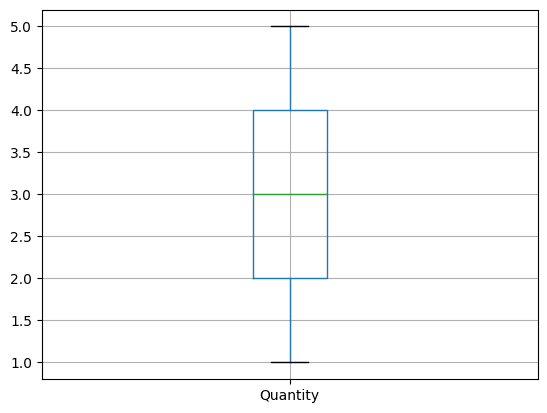

In [15]:
df.boxplot(column=['Quantity'])
plt.show()

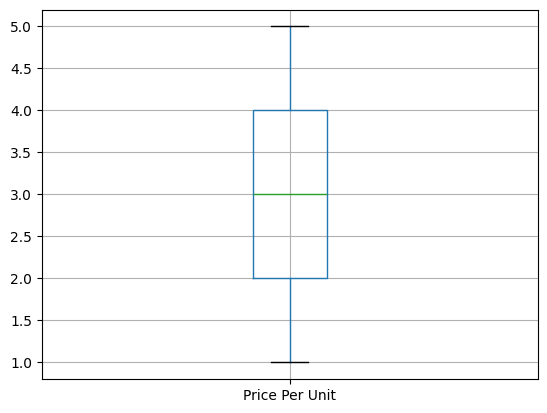

In [16]:
df.boxplot(column=['Price Per Unit'])
plt.show()

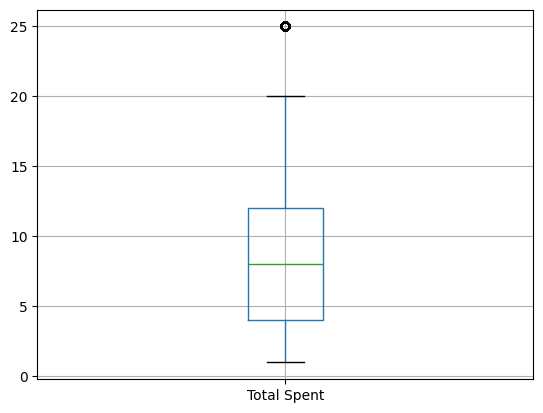

In [17]:
df.boxplot(column=['Total Spent'])
plt.show()

In [18]:
def remove_outlier(col) :
  sorted(col)
  Q1,Q3=col.quantile([0.25,0.75])
  IQR=Q3-Q1
  lower_range=Q1-(1.5*IQR)
  upper_range=Q3+(1.5*IQR)
  return lower_range, upper_range

**There is only outlier in the total spent Column**

In [19]:
lrtotal,urtotal=remove_outlier(df['Total Spent'])

df['Total Spent']=np.where(df['Total Spent']>urtotal,urtotal,df['Total Spent'])
df['Total Spent']=np.where(df['Total Spent']<lrtotal,lrtotal,df['Total Spent'])

df.shape

(10000, 8)

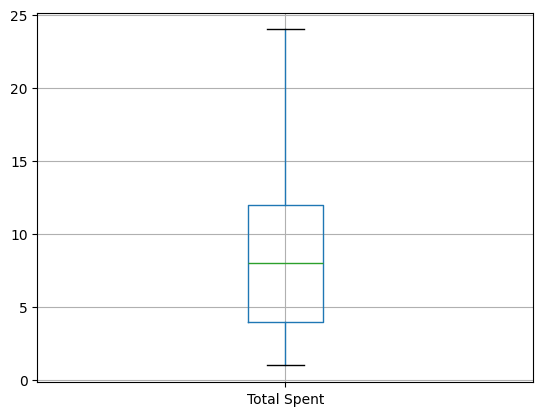

In [20]:
df.boxplot(column=['Total Spent'])
plt.show()

**Check For Missing Values**

In [21]:
df.isnull().sum()

,0
Transaction ID,0
Item,333
Quantity,479
Price Per Unit,533
Total Spent,502
Payment Method,2579
Location,3265
Transaction Date,159


Repalcing NULL Valeus in Numerical Column without outlier with Median values

In [22]:
mean1=df['Quantity'].mean()
mean2=df['Price Per Unit'].mean()

df['Quantity'].replace(np.nan,mean1,inplace=True)
df['Price Per Unit'].replace(np.nan,mean2,inplace=True)

/tmp/ipython-input-1966770236.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Quantity'].replace(np.nan,mean1,inplace=True)
/tmp/ipython-input-1966770236.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try u

Repalcing NULL Valeus in Numerical Column with outlier with Median values

In [23]:
median1=df['Total Spent'].median()

df['Total Spent'].replace(np.nan,median1,inplace=True)

/tmp/ipython-input-1485176516.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Total Spent'].replace(np.nan,median1,inplace=True)


Replacing NULL values in Catrgorical Columns using mode

In [24]:
mode1=df['Item'].mode().values[0]
mode2=df['Location'].mode().values[0]
mode3=df['Transaction Date'].mode().values[0]
mode4=df['Payment Method'].mode().values[0]

df['Item'].replace(np.nan,mode1,inplace=True)
df['Location'].replace(np.nan,mode2,inplace=True)
df['Transaction Date'].replace(np.nan,mode3,inplace=True)
df['Payment Method'].replace(np.nan,mode4,inplace=True)

/tmp/ipython-input-3381697194.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Item'].replace(np.nan,mode1,inplace=True)
/tmp/ipython-input-3381697194.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using

In [25]:
df.isnull().sum()

,0
Transaction ID,0
Item,0
Quantity,0
Price Per Unit,0
Total Spent,0
Payment Method,0
Location,0
Transaction Date,0


**Univariate Analysis**

/tmp/ipython-input-2767627187.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Quantity'],bins=20)


<Axes: xlabel='Quantity', ylabel='Density'>

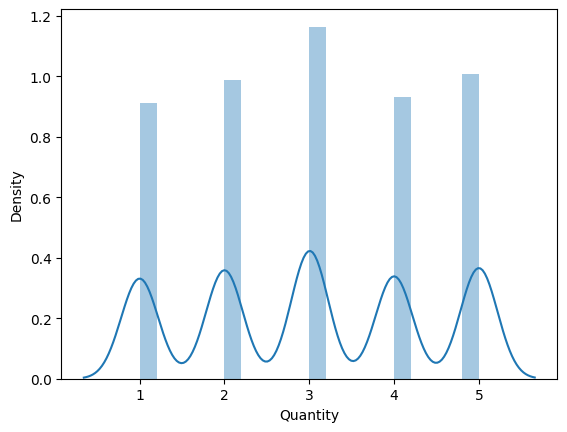

In [26]:
sns.distplot(df['Quantity'],bins=20)

/tmp/ipython-input-2258125958.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price Per Unit'],bins=20)


<Axes: xlabel='Price Per Unit', ylabel='Density'>

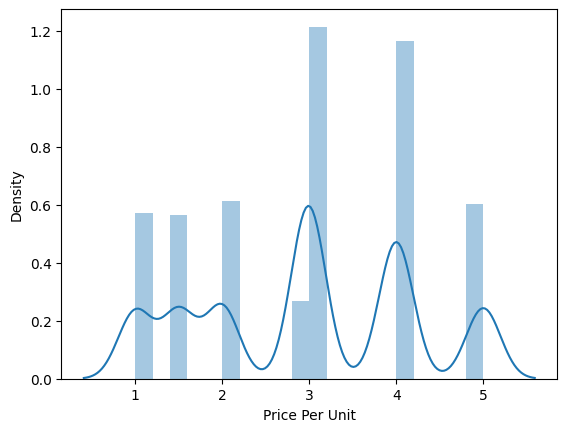

In [27]:
sns.distplot(df['Price Per Unit'],bins=20)

/tmp/ipython-input-3012768801.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Total Spent'],bins=20)


<Axes: xlabel='Total Spent', ylabel='Density'>

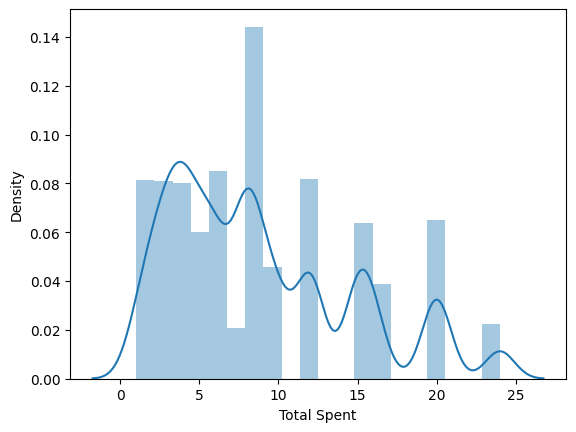

In [28]:
sns.distplot(df['Total Spent'],bins=20)

<Axes: xlabel='count', ylabel='Item'>

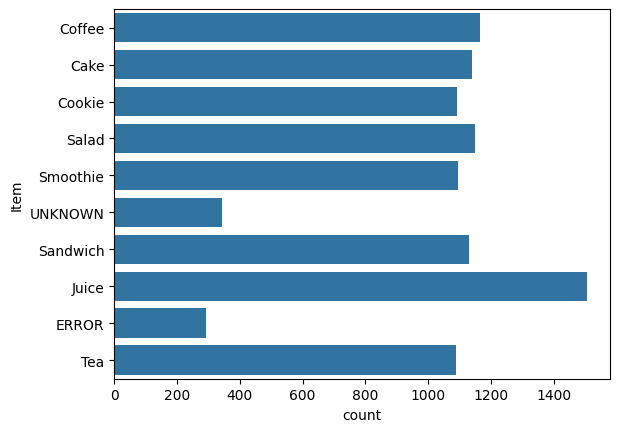

In [29]:
sns.countplot(df['Item'])

**Bivariate Analysis**

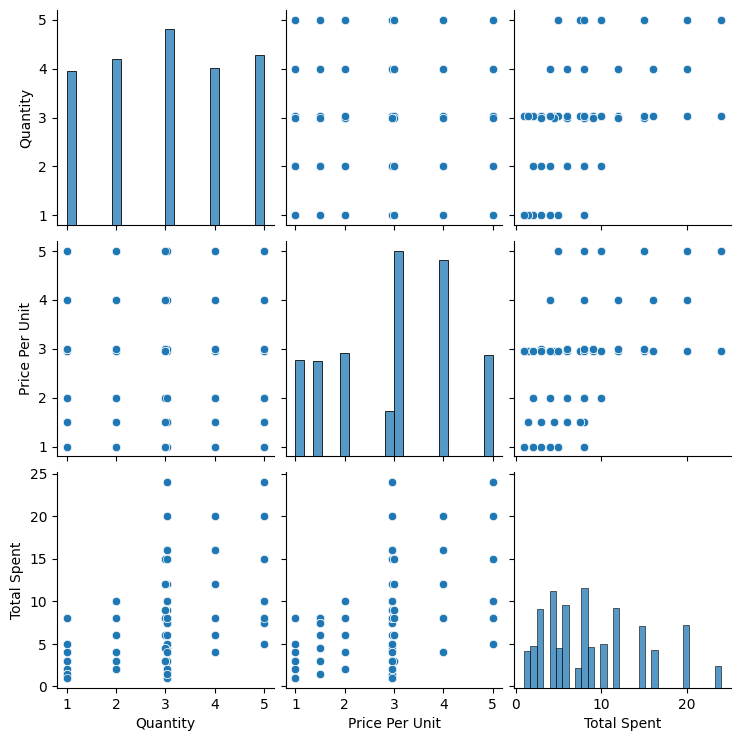

In [30]:
sns.pairplot(df)
plt.show()

<Axes: >

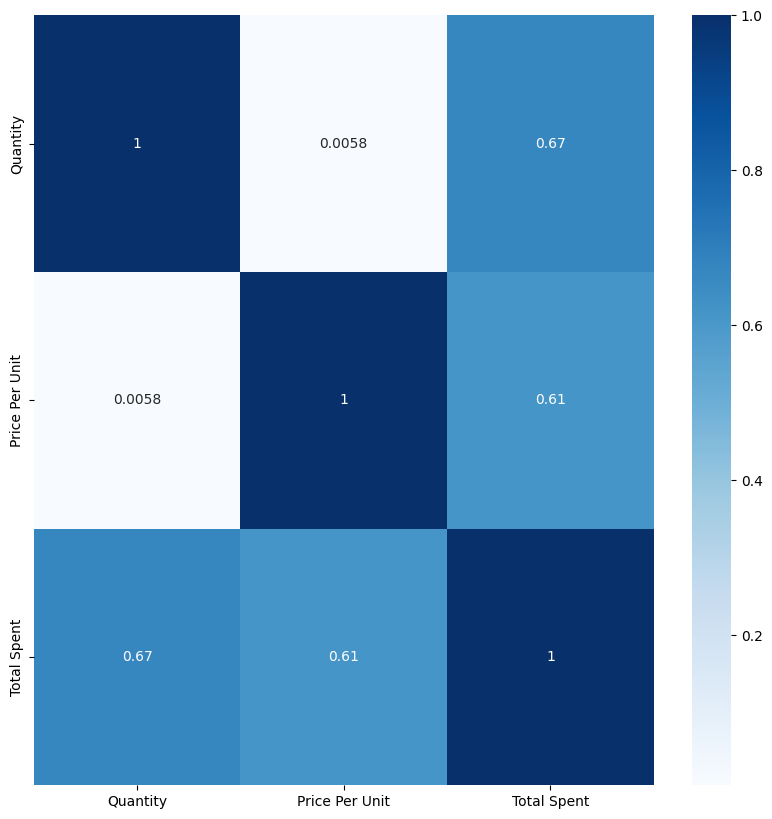

In [31]:
plt.figure(figsize=(10,10))
sns.heatmap(df.drop('Transaction ID', axis=1).corr(numeric_only=True),annot=True,cmap='Blues')

**Normalization and Scaling**

In [32]:
from sklearn.preprocessing import StandardScaler

numerical_cols = ['Quantity', 'Price Per Unit', 'Total Spent']

scaler = StandardScaler()

# Scale the numerical columns
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Display the first few rows of the scaled DataFrame
display(df.head())

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,-0.742824,-0.763746,-0.837892,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,0.701708,0.040211,0.543614,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,0.701708,-1.567703,-0.147139,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,-0.742824,1.648125,0.198237,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,-0.742824,-0.763746,-0.837892,Digital Wallet,In-store,2023-06-11


##ENCODING
Using One hot Encoding to convert the categorical columns into numerical

In [34]:
df.head()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,-0.742824,-0.763746,-0.837892,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,0.701708,0.040211,0.543614,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,0.701708,-1.567703,-0.147139,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,-0.742824,1.648125,0.198237,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,-0.742824,-0.763746,-0.837892,Digital Wallet,In-store,2023-06-11


In [ ]:
df=pd.get_dummies(df,columns=['Item','Location','Payment Method'],drop_first=True)


In [38]:
df.head()

,Transaction ID,Quantity,Price Per Unit,Total Spent,Transaction Date,Item_Coffee,Item_Cookie,Item_ERROR,Item_Juice,Item_Salad,...,Item_Smoothie,Item_Tea,Item_UNKNOWN,Location_In-store,Location_Takeaway,Location_UNKNOWN,Payment Method_Credit Card,Payment Method_Digital Wallet,Payment Method_ERROR,Payment Method_UNKNOWN
0,TXN_1961373,-0.742824,-0.763746,-0.837892,2023-09-08,True,False,False,False,False,...,False,False,False,False,True,False,True,False,False,False
1,TXN_4977031,0.701708,0.040211,0.543614,2023-05-16,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
2,TXN_4271903,0.701708,-1.567703,-0.147139,2023-07-19,False,True,False,False,False,...,False,False,False,True,False,False,True,False,False,False
3,TXN_7034554,-0.742824,1.648125,0.198237,2023-04-27,False,False,False,False,True,...,False,False,False,False,False,True,False,False,False,True
4,TXN_3160411,-0.742824,-0.763746,-0.837892,2023-06-11,True,False,False,False,False,...,False,False,False,True,False,False,False,True,False,False
